In [2]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [3]:
p = plt.rcParams
p['savefig.bbox'] = 'standard'
p["figure.figsize"] = (8*INCH_PER_CM, 7*INCH_PER_CM) # a bit less than half \textwidth
p["figure.subplot.left"]   = 0.17
p['figure.subplot.right']  = 0.97
p['figure.subplot.top']    = 0.97
p['figure.subplot.bottom'] = 0.18

Distance between peaks: 210.000000 nm


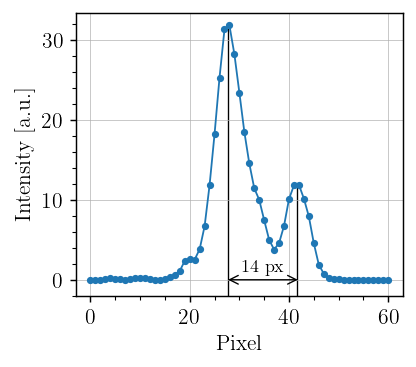

In [59]:
pixel, gray_value = np.loadtxt("../data/microtubules/Acquisition-1/Values_double gaussian.csv", 
                               unpack=True, skiprows=1, delimiter=',')

vline_ls = '-'
vline_lw = 0.75
vline_c = 'black'
vline_zorder = 0

plt.plot(pixel, gray_value,
         marker='.')

plt.ylim(-2)
left_peak = 27.7
right_peak = 41.7
plt.vlines(27.7, plt.ylim()[0], 31.5,
            linestyles=vline_ls, linewidths=vline_lw, colors=vline_c,
            zorder=vline_zorder)
plt.vlines(41.7, plt.ylim()[0], 12,
            linestyles=vline_ls, linewidths=vline_lw, colors=vline_c,
            zorder=vline_zorder)

plt.annotate("", xy=(27, 0), xytext=(42.5,0),  arrowprops=dict(arrowstyle='<->', lw=0.75))
plt.text(30.5,1, f"{right_peak-left_peak:.0f} px",fontsize=10 )
# 1px = 15 nm
print(f"Distance between peaks: {(right_peak - left_peak)*15:f} nm")


plt.xlabel("Pixel")
plt.ylabel("Intensity [a.u.]")
plt.savefig("../figures/microtubules_width.pdf")